In [0]:
# Import numpy, Keras models, layers, utils, preprocessing and datasets modules

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
# Load MNIST dataset from Keras datasets module seperately as train and test datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


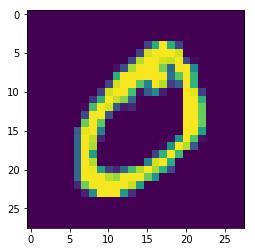

In [0]:
# Display the shape of train dataset. Also show the first image in the train dataset
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
# Reshape train and test dataset so that it also contains the channel information. MNIST contains grey scale images, hence this has just 1 channel
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Convert the Tensor i.e. train and test dataset to float tensors. Also perform a min-max normalization where min = 0 and max = 255 for each pixel. This is also called Pixel normalization.

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# Show 10 items of labels from train dataset
# Convert 1-dimensional class arrays to 10-dimensional class matrices for train and test labels

y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# Show 10 labels from train dataset

Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
#Utilize ImageDataGenerator from Keras to perform Image Normalization i.e. set input mean to 0 over the dataset, feature-wise and divide inputs by std of the dataset, feature-wise

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [0]:
#Fit the ImageDataGenerator so that mean and standard deviation are obtained for train dataset

datagen.fit(X_train)

In [0]:
# Obtain iterators for train and test datasets. This is useful to process huge data and perform Image Normalization/Augmentation at run time

batch_size=128
train_iterator = datagen.flow(X_train, Y_train, batch_size=batch_size)
test_iterator = datagen.flow(X_test, Y_test, batch_size=batch_size, shuffle = False)
print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))

Batches train=469, test=79


In [0]:
#Validate mean and standard deviation from ImageDataGenerator using train dataset with values calculated from train dataset

batchX, batchy = train_iterator.next()


print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))

print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

Statistics train=0.131 (0.308), test=0.133 (0.310)
Data Generator mean=0.131, std=0.308


In [0]:
# Create a CNN model using Keras functions. Use relu for all layers, except at the end. The logits are passed into softmax layer to represent everything between 0 and 1.

from keras.layers import Activation
from keras.regularizers import l2

# Input is an image of size 28x28 with 1 channel
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation=None, use_bias = False, kernel_regularizer=l2(1e-2), input_shape=(28,28,1))) #Input channel 1, number of filters 16, filter size is 3x3 with 1 channel. Receptive field is 3x3. Image Size after convolution is 26. L2 regularization is added and relu is moved after batch normalization.
model.add(BatchNormalization()) #Batch normalization layer
model.add(Activation('relu')) #relu activation function
model.add(Dropout(0.1)) #Dropout

model.add(Convolution2D(32, 3, 3, activation=None, use_bias = False, kernel_regularizer=l2(1e-2))) #Input channel 16, number of filters 32, filter size is 3x3 with 16 channel. Receptive field is 5x5. Image Size after convolution is 24. L2 regularization is added and relu is moved after batch normalization.
model.add(BatchNormalization()) #Batch normalization layer
model.add(Activation('relu')) #relu activation function
model.add(Dropout(0.1)) #Dropout

model.add(Convolution2D(10, 1, 1, activation='relu', use_bias = False, kernel_regularizer=l2(1e-2)))  #Input channel 32, number of filters 10, filter size is 1x1 with 32 channel. Receptive field is 5x5. Image Size after convolution is 24. L2 regularization is added. This is transition block.

model.add(MaxPooling2D(pool_size=(2, 2))) #Input channels 10, number of filters n/a, filter size is n/a with n/a channels. Receptive field is 10x10. Image Size after max pooling is 12. This is max pooling.

model.add(Convolution2D(16, 3, 3, activation=None, use_bias = False, kernel_regularizer=l2(1e-2))) #Input channel 10, number of filters 16, filter size is 3x3 with 10 channel. Receptive field is 12x12. Image Size after convolution is 10. L2 regularization is added and relu is moved after batch normalization.
model.add(BatchNormalization()) #Batch normalization layer
model.add(Activation('relu')) #relu activation function
model.add(Dropout(0.1)) #Dropout


model.add(Convolution2D(16, 3, 3, activation=None, use_bias = False, kernel_regularizer=l2(1e-2)))  #Input channel 16, number of filters 16, filter size is 3x3 with 16 channel. Receptive field is 14x14. Image Size after convolution is 8. L2 regularization is added and relu is moved after batch normalization.
model.add(BatchNormalization()) #Batch normalization layer
model.add(Activation('relu')) #relu activation function
model.add(Dropout(0.1)) #Dropout


model.add(Convolution2D(16, 3, 3, activation=None, use_bias = False, kernel_regularizer=l2(1e-2)))   #Input channel 16, number of filters 16, filter size is 3x3 with 16 channel. Receptive field is 16x16. Image Size after convolution is 6. L2 regularization is added and relu is moved after batch normalization.
model.add(BatchNormalization()) #Batch normalization layer
model.add(Activation('relu')) #relu activation function
model.add(Dropout(0.1)) #Dropout


model.add(Convolution2D(16, 3, 3, activation=None, use_bias = False, kernel_regularizer=l2(1e-2)))  #Input channel 16, number of filters 16, filter size is 3x3 with 16 channel. Receptive field is 18x18. Image Size after convolution is 4. L2 regularization is added and relu is moved after batch normalization.
model.add(BatchNormalization()) #Batch normalization layer
model.add(Activation('relu')) #relu activation function
model.add(Dropout(0.1)) #Dropout


model.add(Convolution2D(10, 4, 4,  use_bias = False)) #Input channel 16, number of filters 10, filter size is 4x4 with 16 channels. 
model.add(BatchNormalization()) #Batch normalization layer
model.add(Dropout(0.1)) #Dropout


model.add(Flatten()) #The outputs from the previous layer are flattened
model.add(Activation('softmax')) #Softmax layer activation layer.So that the values of logits are squished between 0 and 1


model.summary() # Displays the summary of the model i.e. gives the details of different shapes and channels in different layers of the model.

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation=None, use_bias=False, kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  """


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation=None, use_bias=False, kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False, kernel_regularizer=<keras.reg...)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation=None, use_bias=False, kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation=None, use_bias=False, kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launch

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4608      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
__________

In [0]:
# Define learning rate scheduler, compile the model and also create a checkpoint to save the model when accuracy improves

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler,ModelCheckpoint
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model_ckpt = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

#model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

In [0]:
# Calculate steps per epoch and validation steps

from math import ceil
steps_per_epoch = ceil(len(X_train) / batch_size)
validation_steps = ceil(len(X_test)/ batch_size)

In [0]:
#Train the model using fit_generator

model.fit_generator(train_iterator, steps_per_epoch=steps_per_epoch, epochs=40, verbose=1, validation_data=test_iterator, validation_steps=validation_steps, callbacks=[LearningRateScheduler(scheduler, verbose=1),model_ckpt])

Instructions for updating:
Use tf.cast instead.
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/469 [==============================] - 12s 26ms/step - loss: 0.8310 - acc: 0.8542 - val_loss: 1.8754 - val_acc: 0.3150

Epoch 00001: val_acc improved from -inf to 0.31500, saving model to best_model.h5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/469 [==============================] - 8s 18ms/step - loss: 0.3363 - acc: 0.9172 - val_loss: 0.2283 - val_acc: 0.9657

Epoch 00002: val_acc improved from 0.31500 to 0.96570, saving model to best_model.h5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/469 [==============================] - 8s 17ms/step - loss: 0.2840 - acc: 0.9312 - val_loss: 0.2014 - val_acc: 0.9649

Epoch 00003: val_acc did not improve from 0.96570
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
469/469 [===================

In [0]:
# Load the best saved model

from keras.models import load_model
saved_model = load_model('best_model.h5')

In [0]:
#Evaluate the model and print the score i.e. loss and validation accuracy

test_iterator = datagen.flow(X_test, Y_test, batch_size=128, shuffle = False)
score = saved_model.evaluate_generator(test_iterator, verbose=1, steps = validation_steps)
print(score)

79/79 [==============================] - 1s 9ms/step
[0.03607373569905758, 0.9947]


In [0]:
#Obtain predictions, create another iterator for test data such that batch size is same as total number of validation examples and steps = 1

test_iterator = datagen.flow(X_test, Y_test, batch_size=len(Y_test), shuffle = False)
y_pred = saved_model.predict_generator(test_iterator, verbose=1, steps = 1)

1/1 [==============================] - 0s 272ms/step


In [0]:
# Print predictions and actual labels

print(y_pred[:9])
print(Y_test[:9])

[[1.06152504e-06 1.55568409e-06 8.53974780e-06 2.03259492e-06
  2.79066080e-06 2.47913636e-06 5.26657232e-06 9.99969602e-01
  3.80350525e-06 2.89127001e-06]
 [6.82521613e-06 1.01810633e-06 9.99977469e-01 4.11588815e-07
  1.53047961e-06 3.67945290e-06 5.16335922e-06 1.02687954e-06
  1.07531935e-06 1.76436208e-06]
 [2.51569486e-06 9.99925613e-01 6.54391170e-06 1.03673456e-05
  5.78349136e-06 3.01163473e-05 3.10308701e-06 4.60490173e-06
  8.16722968e-06 3.21052403e-06]
 [9.99812424e-01 1.64359808e-05 8.58678777e-06 8.89464718e-06
  9.73601800e-06 1.67130656e-05 1.00154666e-05 1.44297701e-05
  3.41017076e-05 6.86654530e-05]
 [3.37685333e-06 2.86508930e-06 2.29225725e-06 2.90466801e-06
  9.99978900e-01 2.21797200e-06 2.80137397e-06 1.44136652e-06
  1.52792370e-06 1.52719986e-06]
 [1.84123166e-06 9.99943137e-01 5.52300708e-06 6.92836784e-06
  4.61078253e-06 1.70619096e-05 2.27099099e-06 9.54874577e-06
  5.34255560e-06 3.87604587e-06]
 [2.77466315e-05 4.19602984e-05 4.48728770e-06 9.75967669e

In [0]:
# Calculate predicted labels and actual labels

prediction_labels = np.argmax(y_pred, axis = -1)
actual_labels = y_test

In [0]:
# Print predicted and actual labels

print(prediction_labels[:9])
print(actual_labels[:9])

[7 2 1 0 4 1 4 9 5]
[7 2 1 0 4 1 4 9 5]


In [0]:
# Obtain indexes of the images where the actual labels are different from the predicted labels i.e. indexes of misclassified images

mc_idx = []
for idx,val in enumerate(actual_labels):
  if val != prediction_labels[idx]:
    mc_idx.append(idx)
    
print(mc_idx[:9])

[359, 445, 449, 582, 625, 938, 947, 965, 1014]


In [0]:
# Print total number of misclassified images

print(len(mc_idx))

53


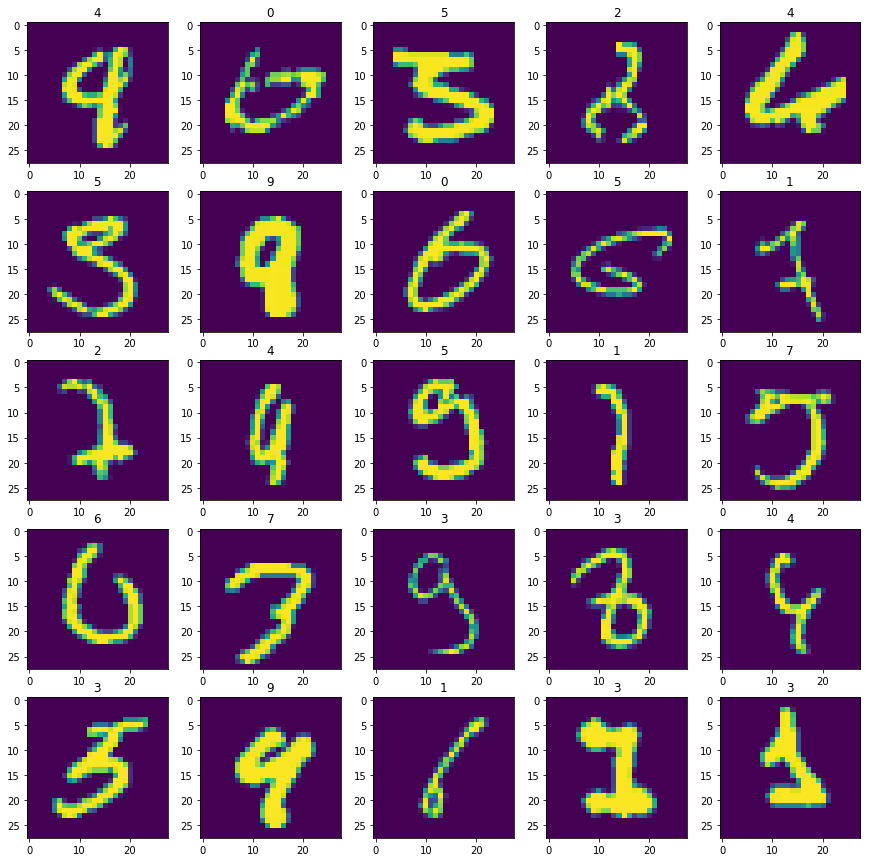

In [0]:
# Image gallery of 25 misclassified images from the validation dataset

w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 5
for i in range(1, columns*rows + 1):
    idx = mc_idx[i-1]
    img = X_test.reshape(X_test.shape[0], 28, 28)[idx]
    fig.add_subplot(rows, columns, i)
    plt.title('%d'%prediction_labels[idx])
    plt.imshow(img)
plt.show()

### **References & Attributions:**

*   Keras (https://keras.io/)

*   Tensorflow 2.1 (https://www.tensorflow.org/api_docs/python/)


*Disclaimer: The contents of this notebook are used for educational purposes i.e. for learning and research.*